# Project 3 Draft 2

Casey May and Alex Wenstrup

In [2]:
#Configure notebook and import libaries
from modsim import *
%matplotlib inline

In [201]:
#Define Units
s = UNITS.second
m = UNITS.meter
kg = UNITS.kilogram
N = UNITS.newton

In [202]:
p = Params(init_speed = 34000 * m/s, 
                init_angle = 2.1205, 
                dist_s = 150e9 * m, 
                mass_s2 = 1e30 * kg)

In [203]:
def make_system(params):
    
    unpack(params)
    
    vx,vy = pol2cart(init_angle, init_speed)
   
    init = State(xp = 0 * m, yp = 0 * m,
                vxp = vx * m/s, vyp = vy * m/s,
                xs1 = -dist_s, ys1 = 0 * m,
                vxs1 = 0 * m/s, vys1 = -10543.6 * m/s,
                xs2 = dist_s, ys2 = 0 * m,
                vxs2 = 0 * m/s, vys2 = 10543.6 * m/s)
    return System(params, 
                  init=init,
                  mass_s1 = 1e30 * kg,
                  mass_p = 1e24 * kg,
                  G = 6.67e-11 * N * m ** 2 / kg ** 2,
                  r_final = 5e9 * m,
                  t_end = 60 * 60 * 24 * 3000 * s)

In [204]:
system = make_system(p)
system

,values
init_speed,34000.0 meter / second
init_angle,2.1205
dist_s,150000000000.0 meter
mass_s2,1e+30 kilogram
init,xp 0...
mass_s1,1e+30 kilogram
mass_p,1e+24 kilogram
G,6.67e-11 meter ** 2 * newton / kilogram ** 2
r_final,5000000000.0 meter
t_end,259200000 second


In [205]:
def relative_position1(state):
    xp, yp, vxp, vyp, xs1, ys1, vxs1, vys1, xs2, ys2, vxs2, vys2 = state
    pos = Vector(xp - xs1, yp - ys1)
    return pos

In [206]:
def relative_position2(state):
    xp, yp, vxp, vyp, xs1, ys1, vxs1, vys1, xs2, ys2, vxs2, vys2 = state
    pos = Vector(xp - xs2, yp - ys2)
    return pos

In [207]:
def relative_position_s1(state):
    xp, yp, vxp, vyp, xs1, ys1, vxs1, vys1, xs2, ys2, vxs2, vys2 = state
    pos = Vector(xs1 - xs2, ys1 - ys2)
    return pos

In [208]:
def relative_position_s2(state):
    xp, yp, vxp, vyp, xs1, ys1, vxs1, vys1, xs2, ys2, vxs2, vys2 = state
    pos = Vector(xs2 - xs1, ys2 - ys1)
    return pos

In [209]:
def grav1(state, t, system):
    xp, yp, vxp, vyp, xs1, ys1, vxs1, vys1, xs2, ys2, vxs2, vys2 = state
    unpack(system)
    pos = relative_position1(state)
    #vel = Vector(vxp, vyp)
    force_mag = -G * mass_s1 * mass_p / (pos.mag ** 2)
    force_dir = pos.hat()
    force = force_dir * force_mag
    return force

In [210]:
def grav2(state, t, system):
    xp, yp, vxp, vyp, xs1, ys1, vxs1, vys1, xs2, ys2, vxs2, vys2 = state
    unpack(system)
    pos = relative_position2(state)
    #vel = Vector(vxp, vyp)
    force_mag = -G * mass_s2 * mass_p / (pos.mag ** 2)
    force_dir = pos.hat()
    force = force_dir * force_mag
    return force

In [211]:
def grav_s1(state, t, system):
    xp, yp, vxp, vyp, xs1, ys1, vxs1, vys1, xs2, ys2, vxs2, vys2 = state
    unpack(system)
    pos = relative_position_s1(state)
    #vel = Vector(vxp, vyp)
    force_mag = -G * mass_s1 * mass_s2 / (pos.mag ** 2)
    force_dir = pos.hat()
    force = force_dir * force_mag
    return force

In [212]:
def grav_s2(state, t, system):
    xp, yp, vxp, vyp, xs1, ys1, vxs1, vys1, xs2, ys2, vxs2, vys2 = state
    unpack(system)
    pos = relative_position_s2(state)
    #vel = Vector(vxp, vyp)
    force_mag = -G * mass_s1 * mass_s2 / (pos.mag ** 2)
    force_dir = pos.hat()
    force = force_dir * force_mag
    return force

In [213]:
def gravp(state, t, system):
    return grav1(state, t, system) + grav2(state, t, system)

In [214]:
def slope_func(state, t, system):
    xp, yp, vxp, vyp, xs1, ys1, vxs1, vys1, xs2, ys2, vxs2, vys2 = state
    unpack(system)  
    
    xhat = Vector(1, 0)
    yhat = Vector(0, 1)
    
    r1= relative_position1(state)
    r2= relative_position2(state)
    forcep = gravp(state, t, system)
    force_s1 = grav_s1(state, t, system)
    force_s2 = grav_s2(state, t, system)
    
    dxpdt = vxp
    dypdt = vyp
    ds1xdt = vxs1
    ds1ydt = vys1
    ds2xdt = vxs2
    ds2ydt = vys2
    
    dvxpdt = forcep.dot(xhat) / mass_p
    dvypdt = forcep.dot(yhat) / mass_p
    dvxs1dt = force_s1.dot(xhat) / mass_s1
    dvys1dt = force_s1.dot(yhat) / mass_s1
    dvxs2dt = force_s2.dot(xhat) / mass_s2
    dvys2dt = force_s2.dot(yhat) / mass_s2
    
    
    return dxpdt, dypdt, dvxpdt, dvypdt, ds1xdt, ds1ydt, dvxs1dt, dvys1dt, ds2xdt, ds2ydt, dvxs2dt, dvys2dt 

In [215]:
def event_func1(state, t, system):
    xp, yp, vxp, vyp, xs1, ys1, vxs1, vys1, xs2, ys2, vxs2, vys2 = state
    unpack(system)  
    
    pos = relative_position1(state)
    return pos.mag - r_final

In [216]:
def event_func2(state, t, system):
    xp, yp, vxp, vyp, xs1, ys1, vxs1, vys1, xs2, ys2, vxs2, vys2 = state
    unpack(system)  
    
    pos = relative_position2(state)
    return pos.mag - r_final

In [217]:
def event_func3(state, t, system):
    xp, yp, vxp, vyp, xs1, ys1, vxs1, vys1, xs2, ys2, vxs2, vys2 = state
    unpack(system)  
    
    pos = relative_position1(state)
    return 750e9 - pos.mag

In [218]:
def event_func4(state, t, system):
    xp, yp, vxp, vyp, xs1, ys1, vxs1, vys1, xs2, ys2, vxs2, vys2 = state
    unpack(system)  
    
    pos = relative_position2(state)
    return 750e9 - pos.mag

In [219]:
results, details = run_ode_solver(system, slope_func, events=(event_func1, event_func2, event_func3, event_func4))
details

,values
sol,None
t_events,"[[], [], [], []]"
nfev,530
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [220]:
details.t_events[0].size

0

In [221]:
results.index /= 60 * 60 * 24
results.xp /= 1e9
results.yp /= 1e9
results.xs1 /= 1e9
results.ys1 /= 1e9
results.xs2 /= 1e9
results.ys2 /= 1e9

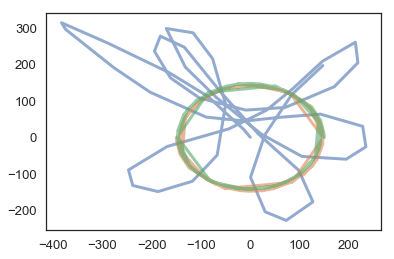

In [222]:
plot(results.xp, results.yp)
plot(results.xs1, results.ys1)
plot(results.xs2, results.ys2)

In [85]:
def time_func(parameters):
    system = make_system(parameters)
    results, deets = run_ode_solver(system, slope_func, events=(event_func1, event_func2, event_func3, event_func4))
    t = system.t_end
    for time in deets.t_events:
        if time.size == 1:
            t = time[0]
    print(t)
    return t

In [88]:
def sweep_angle(angles):
    
    sweep = SweepSeries()

    for angle in angles:
        parameters = Params(p, init_angle = angle)
        time = time_func(parameters)
        sweep[angle] = time
        
    return sweep

init_speed    35000.0 meter / second
init_angle                   3.14159
dist_s          150000000000.0 meter
mass_s2               1e+30 kilogram
dtype: object
216000000 second
216000000 second
216000000 second
179261709.52547604
160245035.6005348
216000000 second
96994296.74666335
114239559.49991667
33136204.061716937
30321645.892246757
28991110.738704134
28105317.398453962
27410473.87056586
26995988.888713796
23347868.356848136
20469978.24475644
18661025.072033122
17602535.319130927
17133447.130045235
17626735.399224255
18752208.50196451


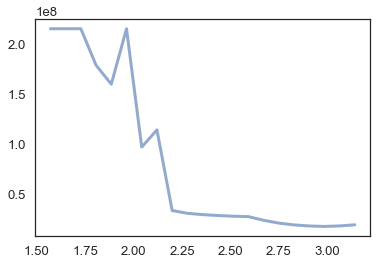

In [89]:
print(p)
angles = linspace(pi/2, pi, 21)
sweep = sweep_angle(angles)
plot(sweep)

In [90]:
sweep

,values
1.570796,216000000 second
1.649336,216000000 second
1.727876,216000000 second
1.806416,1.79262e+08
1.884956,1.60245e+08
1.963495,216000000 second
2.042035,9.69943e+07
2.120575,1.1424e+08
2.199115,3.31362e+07
2.277655,3.03216e+07


In [148]:
def sweep_speed(speeds):
    
    sweep = SweepSeries()

    for speed in speeds:
        parameters = Params(p, init_speed = speed)
        time = time_func(parameters)
        sweep[speed] = time
        
    return sweep

init_speed    35000.0 meter / second
init_angle                    2.1205
dist_s          150000000000.0 meter
mass_s2               1e+30 kilogram
dtype: object
39211307.95390071
36940850.16473211
37799708.63011006
86400000 second
86400000 second
86400000 second
86400000 second
57679445.515700184
69402398.86705333
31784597.90829513
58243642.745415844
86400000 second
86400000 second
32615753.9319552
26507590.487530418
23503513.972301524
21430655.392461363
19839699.579390325
18549686.89826504
17467387.125059254
16537936.636376502


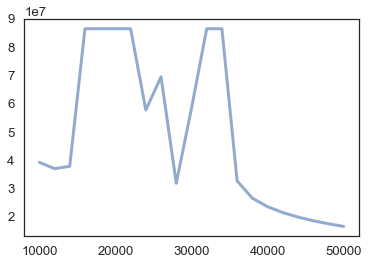

In [149]:
print(p)
speeds = linspace(10000, 50000, 21)
sweep = sweep_speed(speeds)
plot(sweep)

In [150]:
sweep

,values
10000,3.92113e+07
12000,3.69409e+07
14000,3.77997e+07
16000,86400000 second
18000,86400000 second
20000,86400000 second
22000,86400000 second
24000,5.76794e+07
26000,6.94024e+07
28000,3.17846e+07
